# Titanic: Machine Learning from Disaster

<img src='titanic.jpg'>

# Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. In this problem, it was asked to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# Problem statment

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## EDA and data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LassoCV, LogisticRegression, Lasso, RidgeCV, Ridge
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier

plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# read the train and test data 
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
PassengerId = test.PassengerId
y_train = train.Survived

In [3]:
test.shape, train.shape

((418, 11), (891, 12))

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_ws = train.drop("Survived", axis=1)
titanic = pd.concat([train_ws,test], copy =False, ignore_index=True)

In [6]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.shape

(1309, 11)

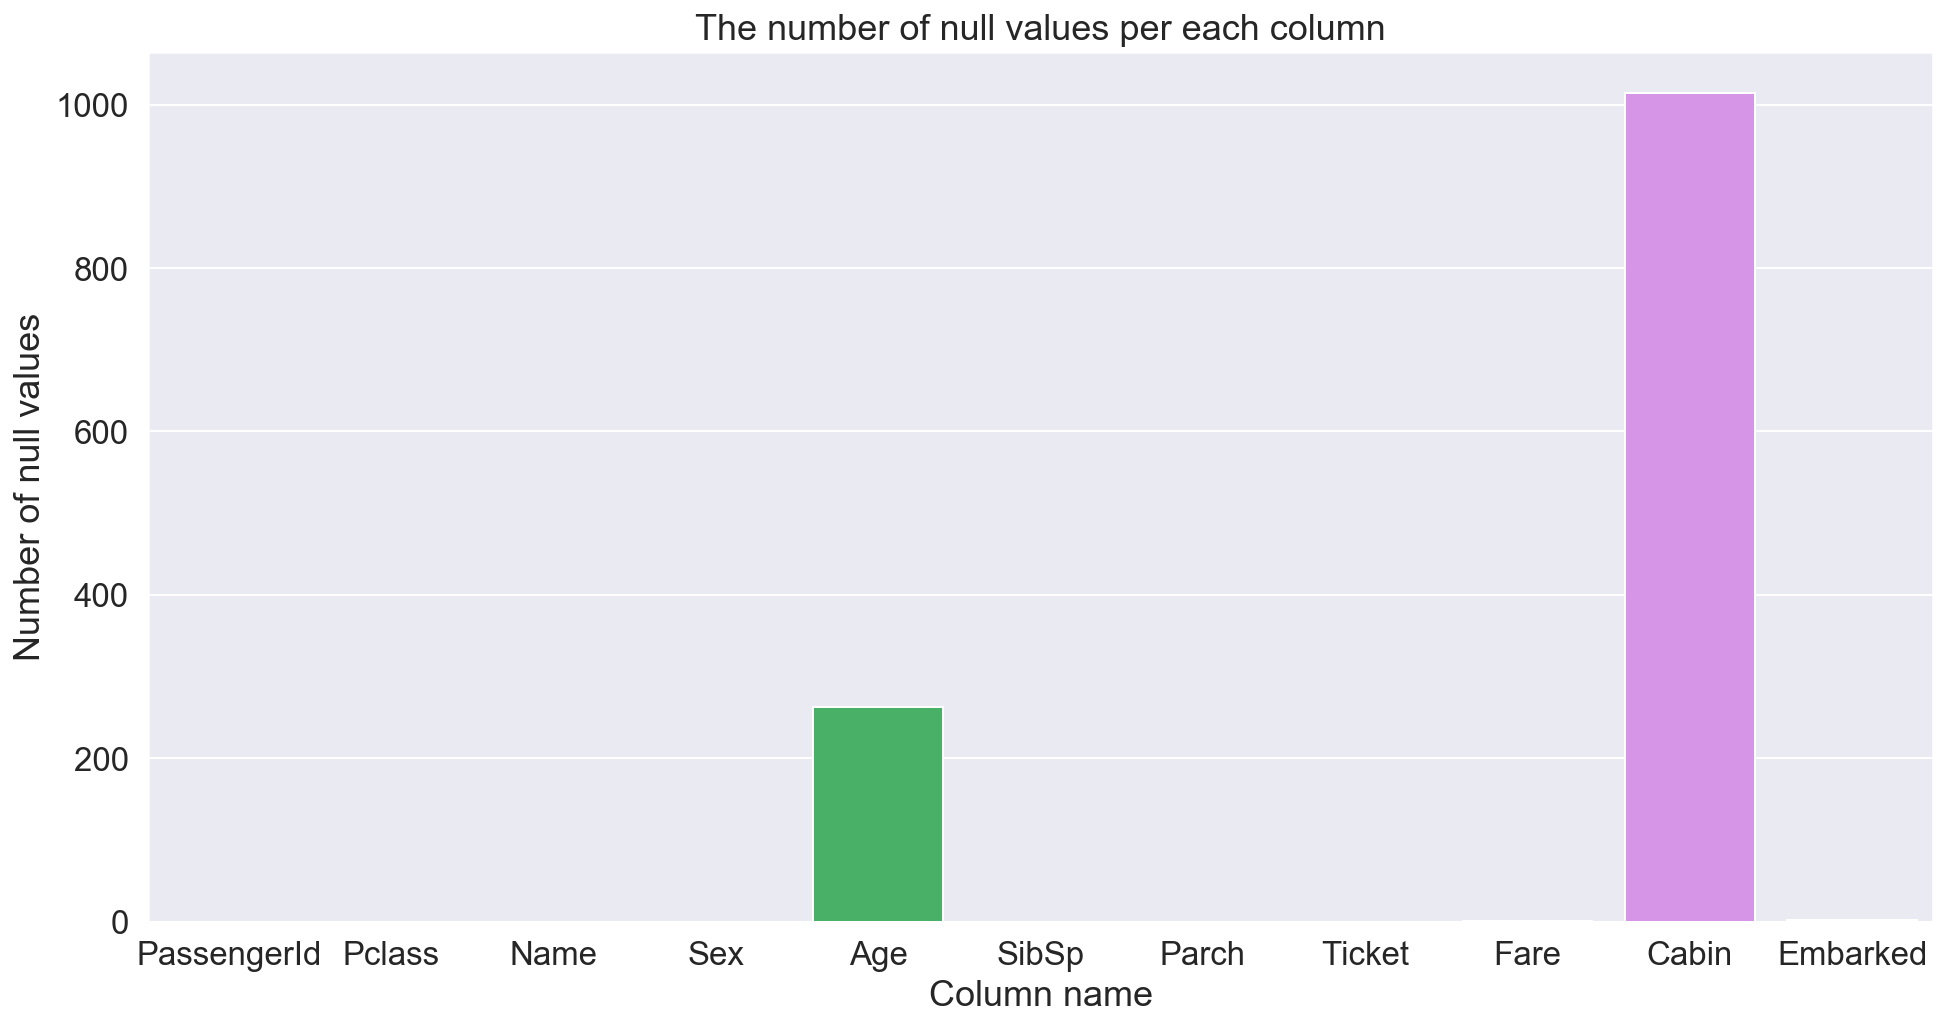

In [8]:
columns = list(titanic.isnull().sum().index)
null_sum = list(titanic.isnull().sum().values)
plt.figure(figsize=(16, 8))
plt.xlabel("Column name")
plt.ylabel("Number of null values")
plt.title("The number of null values per each column")
sns.barplot(x = columns, y =null_sum)
plt.show()


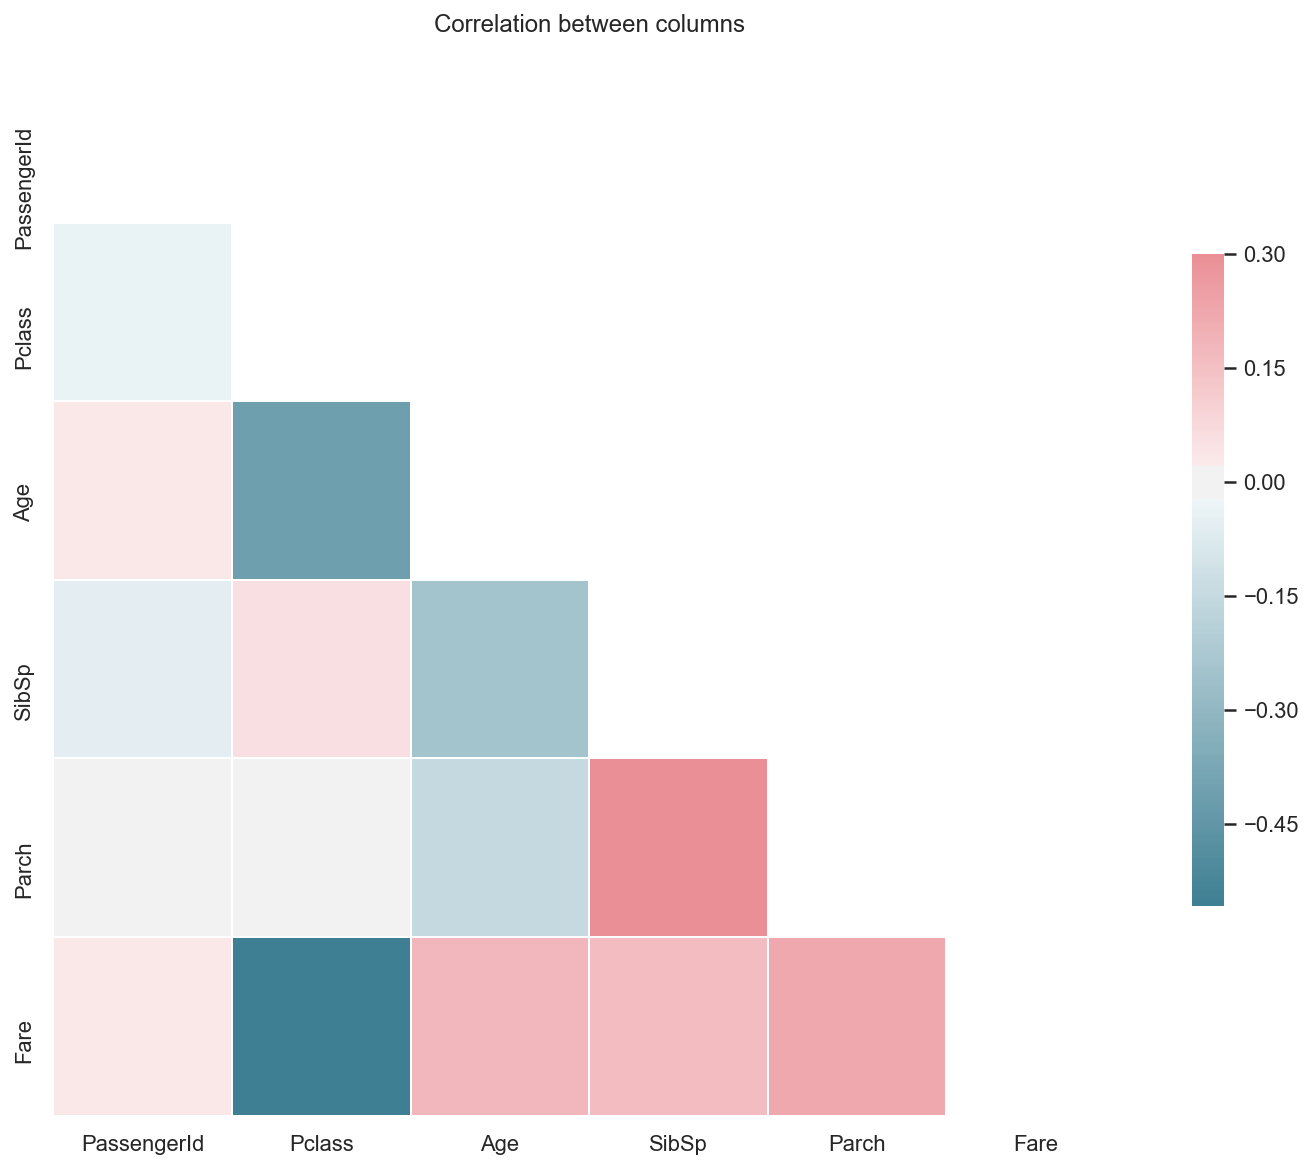

In [9]:

sns.set(style="white")
corr = titanic.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.figure(figsize=(12,12))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation between columns")
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


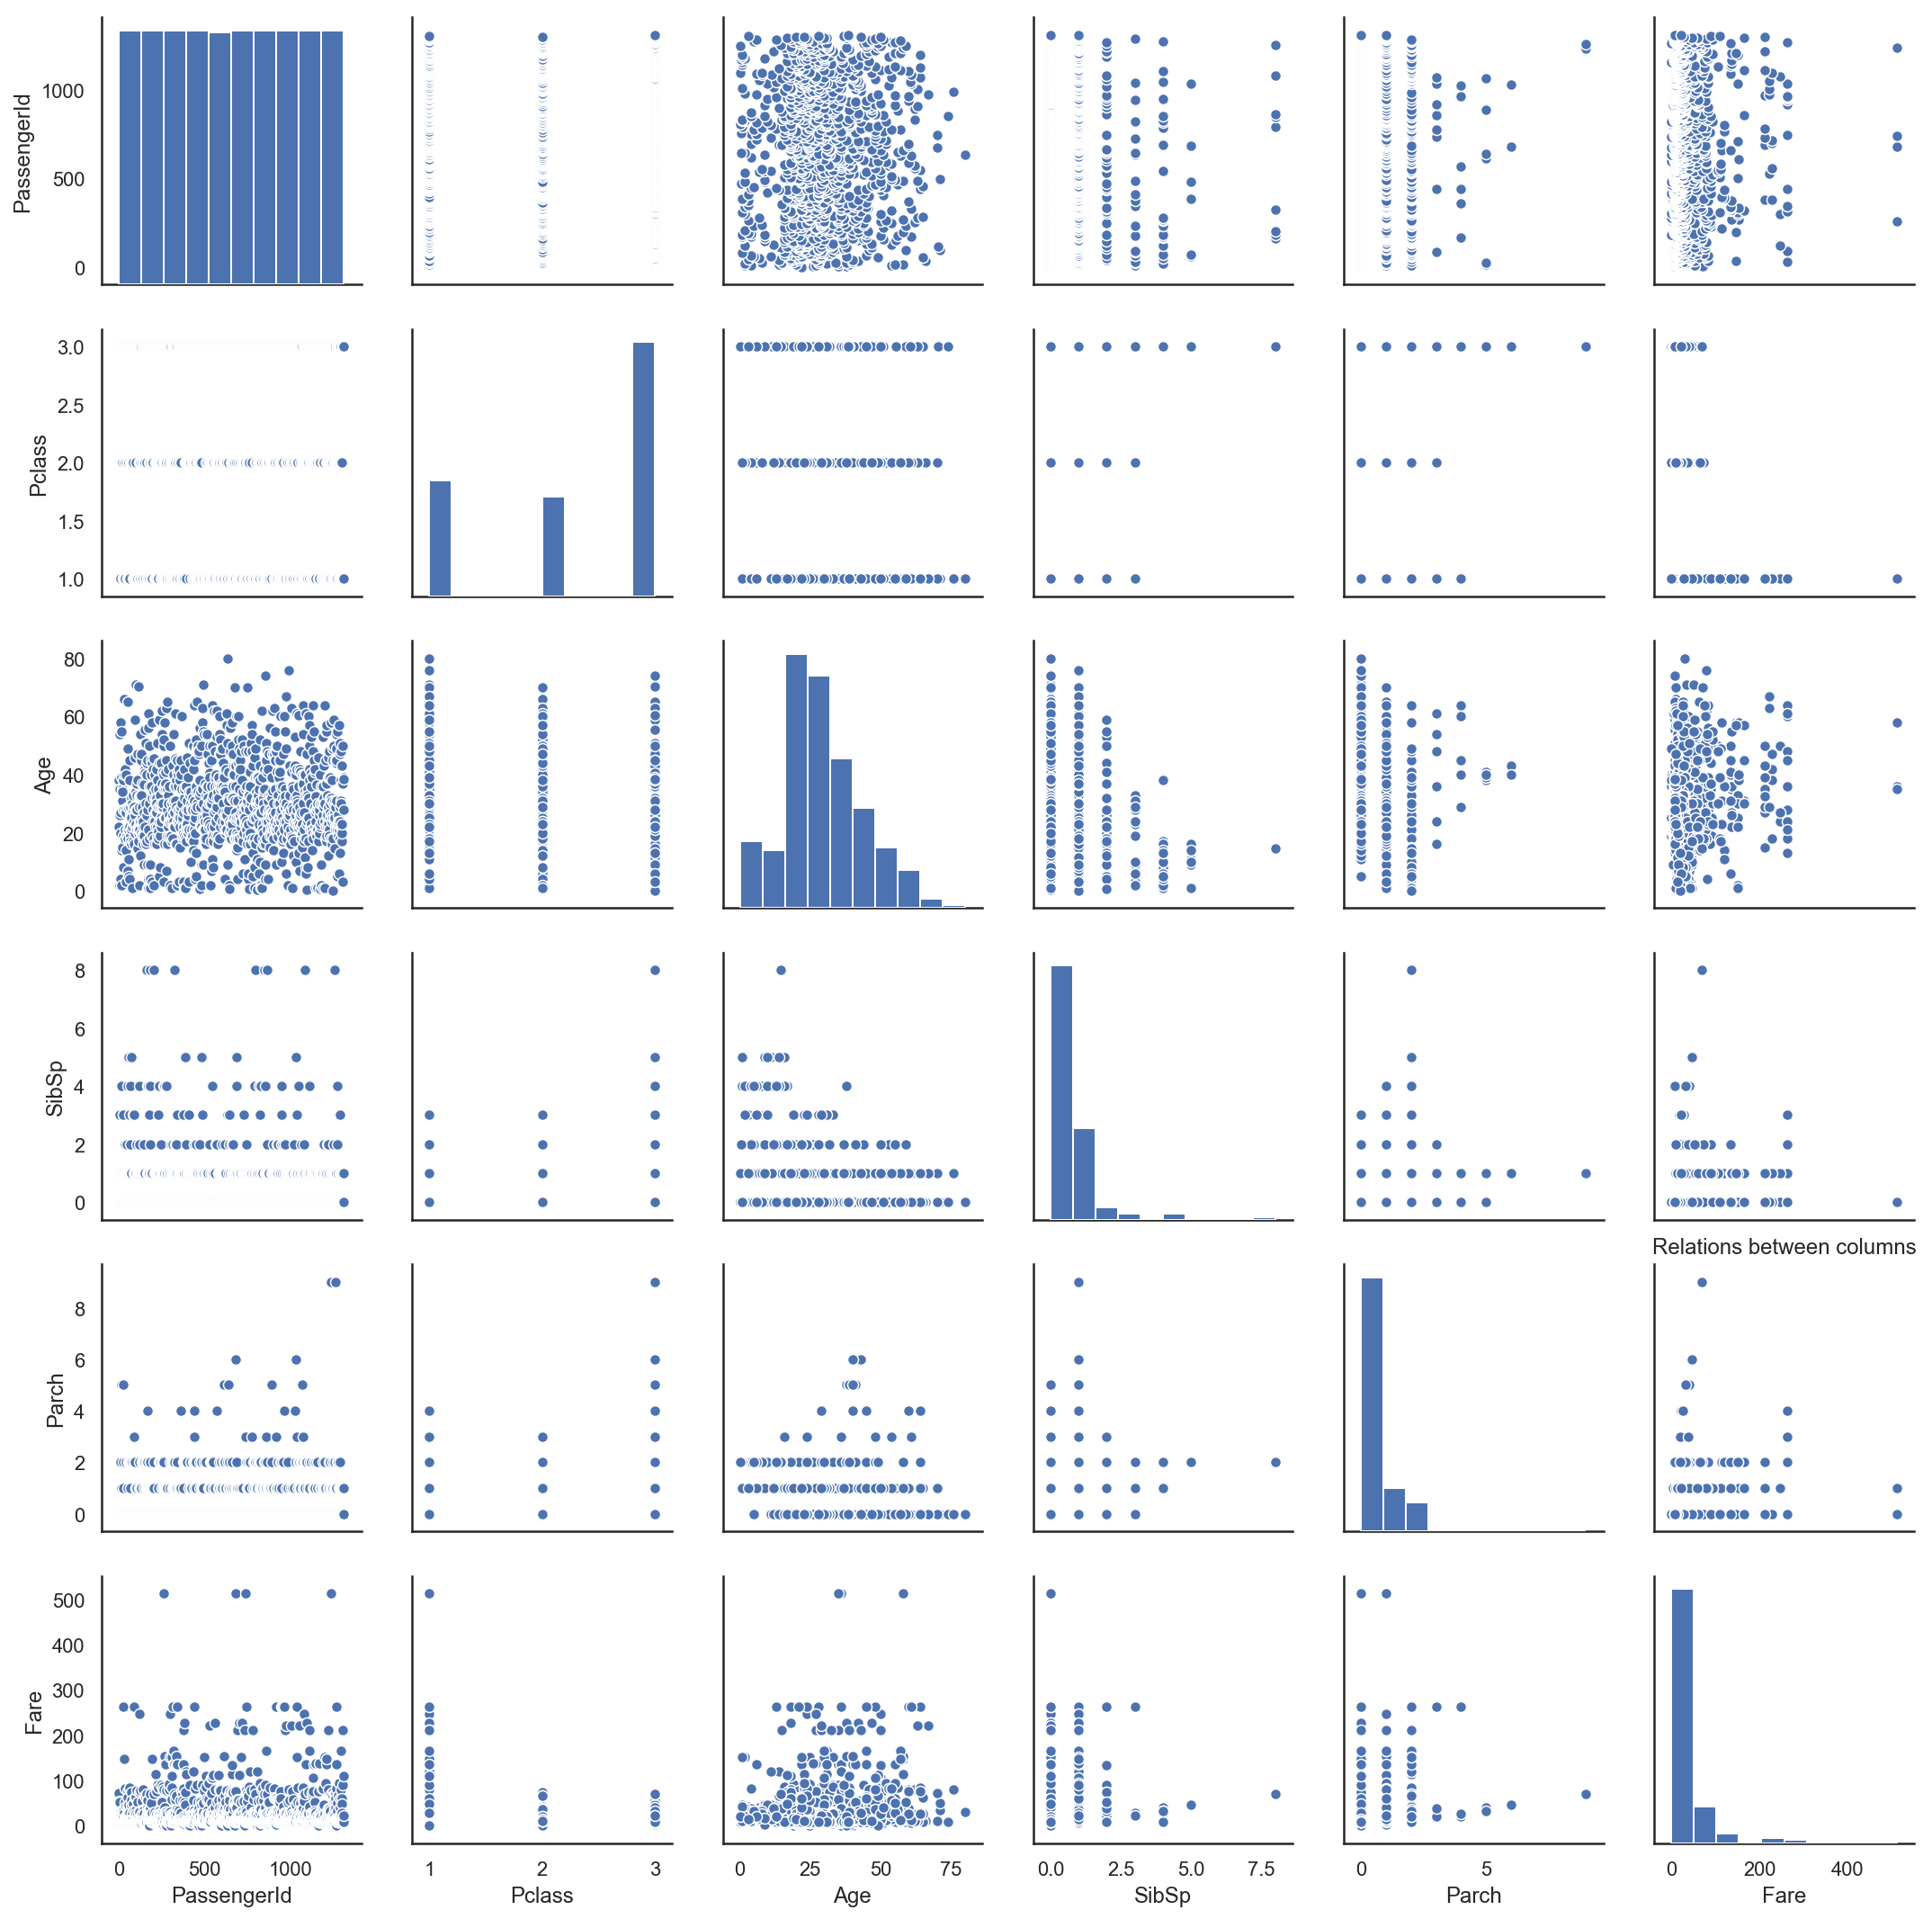

In [10]:
sns.pairplot(titanic)
plt.title("Relations between columns")
plt.show()

In [11]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


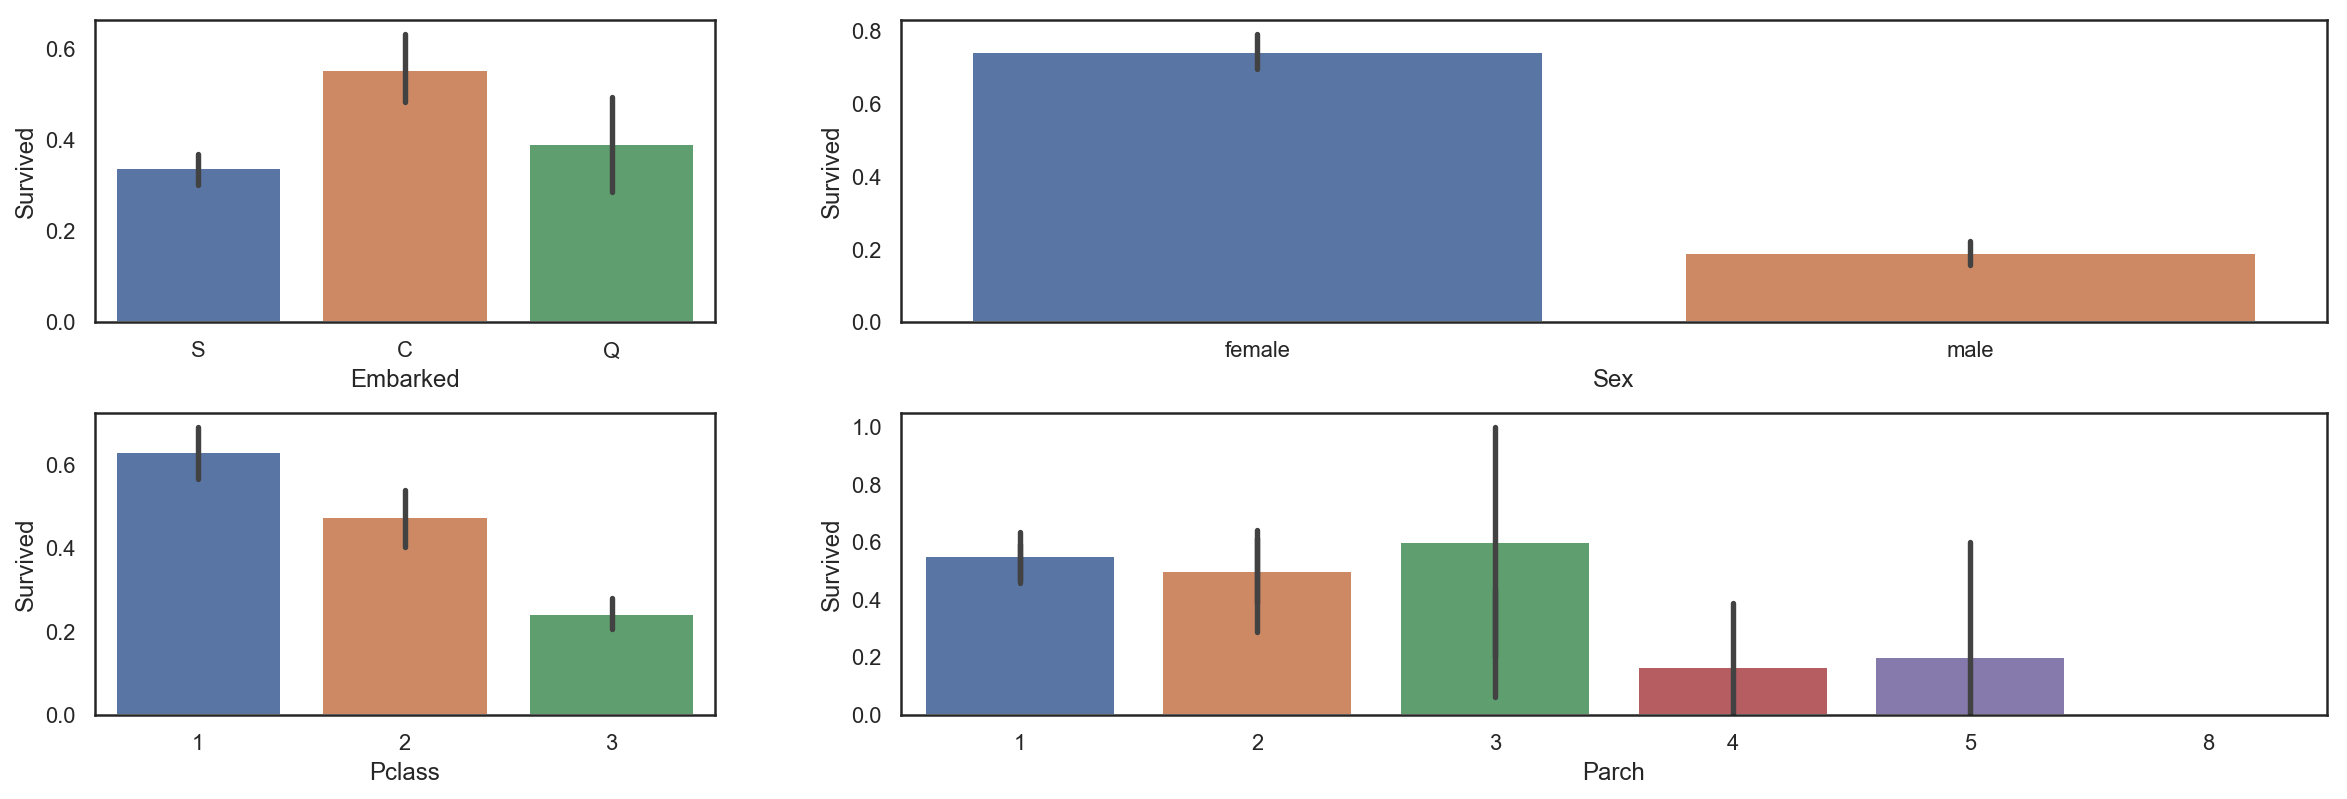

In [13]:

grid = plt.GridSpec(3, 3, wspace=0.30, hspace=0.30)
plt.subplots(figsize =(20, 10))
plt.subplot(grid[0,0])
sns.barplot(x="Embarked", y="Survived", data=train, order=['S', 'C', 'Q']);
plt.subplot(grid[0,1:])
sns.barplot(x="Sex", y="Survived", data=train, order=['female', 'male']);
plt.subplot(grid[1, 0])
sns.barplot(x="Pclass", y="Survived", data=train, order=[1, 2, 3]);
plt.subplot(grid[1, 1:])
sns.barplot(x="SibSp", y="Survived", data=train, order=[1, 2, 3, 4, 5, 8]);
plt.subplot(grid[1, 1:])
sns.barplot(x="Parch", y="Survived", data=train, order=[1, 2, 3, 4, 5, 8]);


## Fill the null values

In [14]:
titanic.groupby("Pclass").count()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,
1,323,323,323,284,323,323,323,323,256,321
2,277,277,277,261,277,277,277,277,23,277
3,709,709,709,501,709,709,709,708,16,709


In [15]:
titanic[titanic["Pclass"]==1].Cabin.unique()

array(['C85', 'C123', 'E46', 'C103', 'A6', 'C23 C25 C27', nan, 'B78',
       'D33', 'B30', 'C52', 'B28', 'C83', 'E31', 'A5', 'D10 D12', 'D26',
       'C110', 'B58 B60', 'D47', 'B86', 'C2', 'E33', 'B19', 'A7', 'C49',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'C62 C64', 'E24', 'C90',
       'C45', 'E8', 'B101', 'D45', 'C46', 'D30', 'D11', 'B3', 'D6',
       'B8

In [16]:
titanic[titanic["Pclass"]==2].Cabin.unique()

array([nan, 'D56', 'F33', 'E101', 'F2', 'F4', 'D', 'E77', 'F', 'D38'],
      dtype=object)

In [17]:
titanic[titanic["Pclass"]==3].Cabin.unique()

array([nan, 'G6', 'F G73', 'F E69', 'E10', 'F G63', 'E121', 'F38',
       'F E46', 'F E57'], dtype=object)

In [18]:
titanic[titanic["Pclass"]==3].Cabin.value_counts()

G6       5
E121     2
F G63    2
F G73    2
F E46    1
F E69    1
E10      1
F E57    1
F38      1
Name: Cabin, dtype: int64

In [19]:
titanic[titanic["Pclass"]==2].Cabin.value_counts()

F2      4
F33     4
D       4
F4      4
E101    3
E77     1
F       1
D56     1
D38     1
Name: Cabin, dtype: int64

**The Deck for each class in Titanic**  
<img src = "687px-Titanic_cutaway_diagram.png">

In [20]:
titanic.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [21]:
import math
titanic["Deck"] = titanic.Cabin.map(lambda x : "N" if type(x) == float  else x[0])

In [22]:
titanic["Deck"].value_counts()

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [23]:
# A1: Create a new column called FamilyCount
titanic["FamilyCount"] = titanic.apply(lambda row: row.SibSp + row.Parch , axis = 1) 

In [24]:
titanic["FamilyCount"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: FamilyCount, dtype: int64

In [25]:
# Extract the title from everyone's name
titels = list(set([name.split(",")[1].split(".")[0]+"." for name in titanic["Name"]]))
titels

[' the Countess.',
 ' Ms.',
 ' Dr.',
 ' Jonkheer.',
 ' Mme.',
 ' Dona.',
 ' Miss.',
 ' Mlle.',
 ' Sir.',
 ' Mr.',
 ' Col.',
 ' Rev.',
 ' Mrs.',
 ' Lady.',
 ' Capt.',
 ' Master.',
 ' Don.',
 ' Major.']

In [26]:
# the set_title function takes a data frame row and returns the title of a person  
def set_title(row):
    for title in titels:
        if title in row["Name"]:
            return title
    

In [27]:
titanic["Title"] = titanic.apply(set_title, axis=1)

In [28]:
normalized_titles = {
    ' Capt.':       "Officer",
     ' Col.':        "Officer",
     ' Major.':      "Officer",
    ' Jonkheer.':   "Royalty",
    ' Don.':        "Royalty",
    ' Sir.' :       "Royalty",
    ' Dr.':         "Officer",
    ' Rev.':        "Officer",
   ' the Countess.':"Royalty",
    ' Dona.':       "Royalty",
   ' Mme.':        "Mrs",
    ' Mlle.':       "Miss",
     ' Ms.':         "Mrs",
     ' Mr.':        "Mr",
    ' Mrs.':       "Mrs",
    ' Miss.' :      "Miss",
     ' Master.':    "Master",
     ' Lady.':      "Royalty"
}

titanic["Title_norm"] = titanic.Title.map(normalized_titles)


In [29]:
titanic["Title_norm"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

In [30]:
titles = list(titanic["Title_norm"].unique())
titles_age_mean = dict(titanic.groupby("Title_norm").mean()["Age"])    

In [31]:
def fill_age(row):
    if np.isnan(row.Age): 
        row.Age = titles_age_mean[row.Title_norm] 
    return row 
titanic = titanic.apply(fill_age, axis=1)

In [32]:
titanic.Age.isnull().sum()

0

In [33]:
titanic.Age = titanic.Age.map(lambda x: int(round(x)))

In [34]:
def set_age_group(row):
    age = row["Age"]
    if age <=2:
        return"Toddler"
    elif age >= 3 and age < 13:
        return "Child"
    elif age >= 13 and age < 20:
        return "Teenager"
    elif age >= 20 and age < 50:
        return "Adult"
    else:
        return "Elderly"

In [35]:
titanic["Age_group"] = titanic.apply(set_age_group, axis=1)

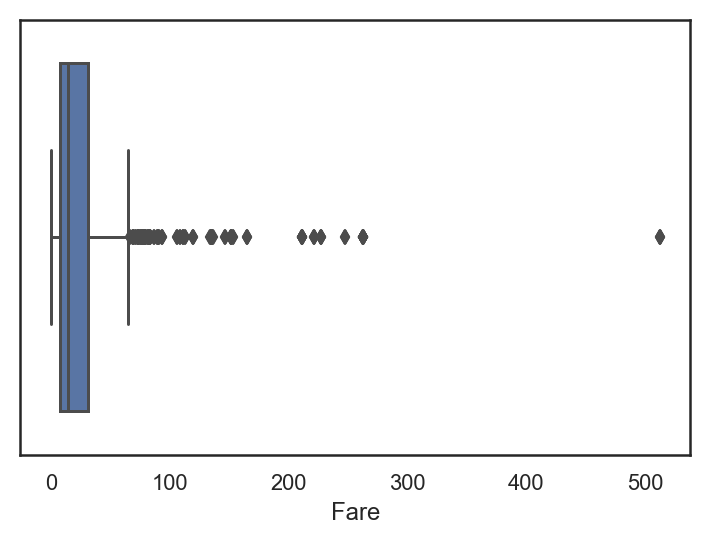

In [36]:
sns.boxplot(titanic.Fare)
plt.show()

In [37]:
def set_fare_category(row):
    fare = row["Fare"]
    if fare == 0:
        return "none"
    elif fare < 10:
        return "Cheap"
    elif fare >= 10 and fare < 30:
        return "Moderate1"
    elif fare >= 30 and fare < 60:
        return "Moderate2"
    else:
        return "Expensive"

In [38]:
titanic["Fare_category"] = titanic.apply(set_fare_category, axis=1)

In [39]:
titanic.Fare.fillna(titanic[titanic.Pclass==3].Fare.mean(),inplace=True)

In [40]:
titanic.Fare = titanic.Fare.map(lambda x: int(round(x)))

In [41]:
titanic["FamilyCount"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: FamilyCount, dtype: int64

In [42]:
train[(train.Parch+train.SibSp) >4].Survived.value_counts()

0    40
1     7
Name: Survived, dtype: int64

In [43]:
def set_family_num(row):
    family = row["FamilyCount"]
    if family == 0:
        return "Zero"
    elif family ==1:
         return "One"
    elif family ==2:
         return "Two"
    else:
        return "Three_or_more"

In [44]:
titanic["Family_Number"] = titanic.apply(set_family_num, axis=1)

In [45]:
titanic.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilyCount,Title,Title_norm,Age_group,Fare_category,Family_Number
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S,N,1,Mr.,Mr,Adult,Cheap,One


In [46]:
titanic_clean = titanic.drop(columns=["PassengerId", "Name", "Ticket", "Title","Cabin", "FamilyCount","Age","Fare","SibSp","Parch"], axis=1)

In [47]:
titanic_clean.Embarked = titanic_clean.Embarked.fillna("S")

In [48]:
titanic_clean.isnull().sum()

Pclass           0
Sex              0
Embarked         0
Deck             0
Title_norm       0
Age_group        0
Fare_category    0
Family_Number    0
dtype: int64

In [49]:
titanic_clean=pd.get_dummies(titanic_clean, drop_first=True)

In [50]:
titanic_clean = titanic_clean.applymap(lambda x : int(x))

In [51]:
titanic_clean.head(3)

,Pclass,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,...,Age_group_Elderly,Age_group_Teenager,Age_group_Toddler,Fare_category_Expensive,Fare_category_Moderate1,Fare_category_Moderate2,Fare_category_none,Family_Number_Three_or_more,Family_Number_Two,Family_Number_Zero
0,3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
ntrain = train.shape[0]
x_train = titanic_clean[:ntrain]
x_test = titanic_clean[ntrain:]

In [55]:
x_train.head()

,Pclass,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,...,Age_group_Elderly,Age_group_Teenager,Age_group_Toddler,Fare_category_Expensive,Fare_category_Moderate1,Fare_category_Moderate2,Fare_category_none,Family_Number_Three_or_more,Family_Number_Two,Family_Number_Zero
0,3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Modeling

In [56]:
params = {"n_estimators":[180, 500],
          "max_depth":[ 500,600,700]}
random_forset = RandomForestClassifier()
gs =GridSearchCV(cv= 10, estimator = random_forset,
    param_grid=params)
gs.fit(x_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [180, 500], 'max_depth': [500, 600, 700]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [57]:
gs.best_score_

0.8092031425364759

In [58]:
random_forset = RandomForestClassifier(n_estimators=500)
random_forset.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
random_forset.score(x_train, y_train)

0.8945005611672279

In [60]:
np.mean(cross_val_score(random_forset,x_train, y_train,cv=10))

0.8036783565997048

In [61]:
y_prd = random_forset.predict(x_test)

In [62]:
pd.concat([PassengerId, pd.Series(y_prd, name="Survived")], axis=1).to_csv("random_forset_6_preds.csv", index=False)

In [63]:
parm_grid = {'gamma': np.logspace(-5, 2, 20)}

In [64]:
svm_l = svm.SVC()

In [65]:
grid= GridSearchCV(svm_l, param_grid=parm_grid, cv = 5)

In [66]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': array([1.00000e-05, 2.33572e-05, 5.45559e-05, 1.27427e-04, 2.97635e-04,
       6.95193e-04, 1.62378e-03, 3.79269e-03, 8.85867e-03, 2.06914e-02,
       4.83293e-02, 1.12884e-01, 2.63665e-01, 6.15848e-01, 1.43845e+00,
       3.35982e+00, 7.84760e+00, 1.83298e+01, 4.28133e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
grid.best_score_

0.8294051627384961

In [68]:
y_prd = grid.predict(x_test)

In [69]:
pd.concat([PassengerId, pd.Series(y_prd, name="Survived")], axis=1).to_csv("random_forset_preds.csv", index=False)

In [70]:
extra = ExtraTreesClassifier()

In [71]:
extra.fit(x_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [72]:
extra.score(x_train, y_train)

0.8945005611672279

In [73]:
feat_importances = pd.Series(extra.feature_importances_*100, index=x_train.columns)

In [74]:
x_train_2 = x_train.drop(columns=["Deck_T","Deck_G","Title_norm_Royalty","Deck_F","Deck_C",
                                  "Deck_B","Deck_D", "Fare_category_Expensive"
                                 , "Age_group_Elderly","Title_norm_Officer","Deck_E"]
                         , axis = 1)
x_test_2 = x_test.drop(columns=["Deck_T","Deck_G","Title_norm_Royalty","Deck_F","Deck_C",
                                  "Deck_B","Deck_D", "Fare_category_Expensive"
                                 , "Age_group_Elderly","Title_norm_Officer","Deck_E"]
                         , axis = 1)

In [75]:
random_forset = RandomForestClassifier(n_estimators=300, max_depth=10)
random_forset.fit(x_train_2, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
random_forset.score(x_train_2, y_train)

0.8765432098765432

In [77]:
y_prd = random_forset.predict(x_test_2)

In [78]:
pd.concat([PassengerId, pd.Series(y_prd, name="Survived")], axis=1).to_csv("random_forset_2_preds.csv", index=False)

In [79]:
#Modelling 
#Adaboost Gridsearch 



dt = DecisionTreeClassifier()
ada = AdaBoostClassifier(DecisionTreeClassifier(),)
params = {"n_estimators":[180, 250, 300],
          "learning_rate": [0.1,1],
          "base_estimator__max_depth":[60, 75],
         "base_estimator__max_features":[15,20,26]
         }
gs =GridSearchCV(estimator = ada,
    param_grid=params)
gs.fit(x_train, y_train)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [180, 250, 300], 'learning_rate': [0.1, 1], 'base_estimator__max_depth': [60, 75], 'base_estimator__max_features': [15, 20, 26]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [80]:
#Adaboost best estimator 
dt = DecisionTreeClassifier(max_depth=75, max_features=20)
ada = AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=1, n_estimators=300)
ada.fit(x_train, y_train)
np.mean(cross_val_score(ada, x_train, y_train, cv=7)), ada.score(x_train, y_train)


(0.79577273822915, 0.8945005611672279)

In [81]:
y_prd = ada.predict(x_test)

In [82]:
pd.concat([PassengerId, pd.Series(y_prd, name="Survived")], axis=1).to_csv("random_forset_preds.csv", index=False)

In [83]:
svm_l = svm.SVC(kernel="rbf", gamma=1)
svm_l.fit(x_train, y_train)
cross_val_score(svm_l, x_train, y_train, cv = 6).mean()

0.804749380252736

In [84]:
svm_l.score(x_train, y_train)

0.8911335578002245

In [85]:
y_prd_svm = svm_l.predict(x_test)

In [86]:
pd.concat([PassengerId, pd.Series(y_prd_svm, name="Survived")], axis=1).to_csv("SVM_2_preds.csv", index=False)

In [87]:
tree = DecisionTreeClassifier()


In [88]:
params = {"max_features":[0.8, .6, .7], "n_estimators":[30, 50, 180,300]}


In [89]:
tree_ens = BaggingClassifier(base_estimator=tree, oob_score=True)
gs = GridSearchCV(tree_ens, param_grid= params )
gs.fit(x_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            ...estimators=10, n_jobs=None, oob_score=True,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [0.8, 0.6, 0.7], 'n_estimators': [30, 50, 180, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [90]:
gs.best_score_

0.8103254769921436

In [91]:
gs.best_params_

{'max_features': 0.6, 'n_estimators': 50}

In [92]:
y_prd_bag = gs.predict(x_test)

In [93]:
pd.concat([PassengerId, pd.Series(y_prd_bag, name="Survived")], axis=1).to_csv("bagging_preds.csv", index=False)

# Conclusion
 We started with the data exploration where we got a feeling for the dataset. During this process we used seaborn and matplotlib to do the visualizations. During the data preprocessing part, we computed missing values, converted features into numeric ones, grouped values into categories and created a few new features. Afterwards we started training many different machine learning models, picked one of them (random forest) and applied cross validation on it. Then we discussed how random forest works.